<a href="https://colab.research.google.com/github/Edina-24/codsoft_1/blob/main/oasis_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U kaleido

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kaggle1/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
102,103,7.1,3.0,5.9,2.1,Iris-virginica
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
146,147,6.3,2.5,5.0,1.9,Iris-virginica


In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df[df.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [ ]:
import matplotlib.pyplot as plt

<Axes: >

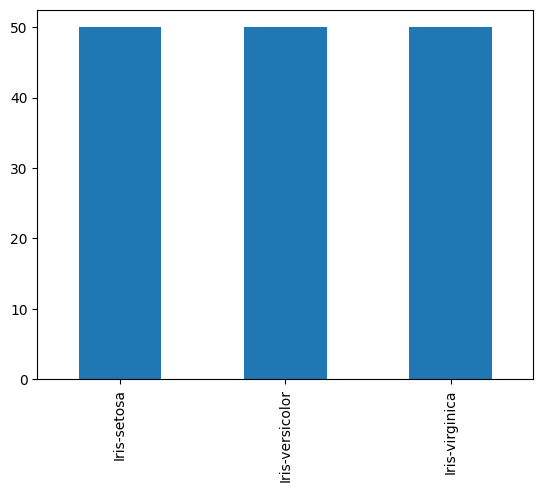

In [ ]:
df['Species'].value_counts().plot(kind='bar')

<Axes: ylabel='Species'>

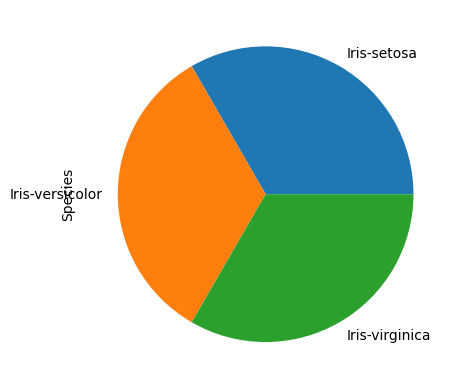

In [ ]:
df['Species'].value_counts().plot.pie()

<Axes: xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

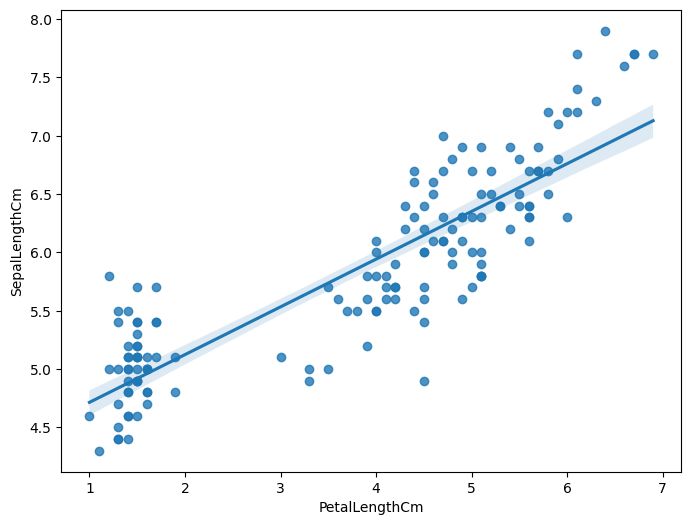

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='PetalLengthCm',y='SepalLengthCm',data=df)

<Axes: xlabel='PetalWidthCm', ylabel='SepalWidthCm'>

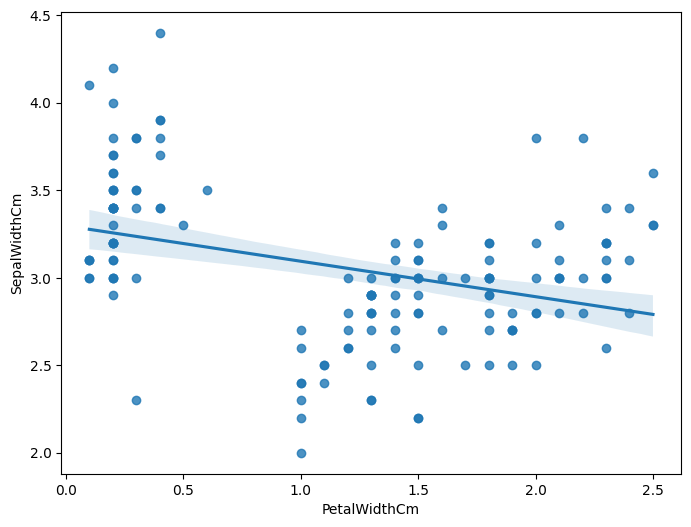

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='PetalWidthCm',y='SepalWidthCm',data=df)

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

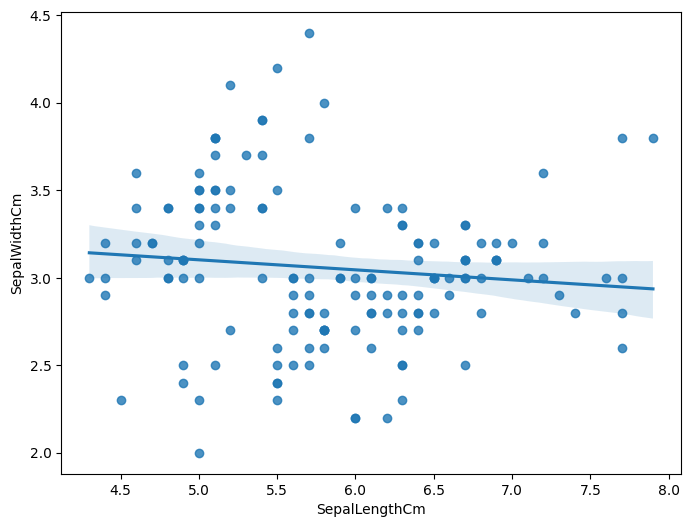

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='SepalLengthCm',y='SepalWidthCm',data=df)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

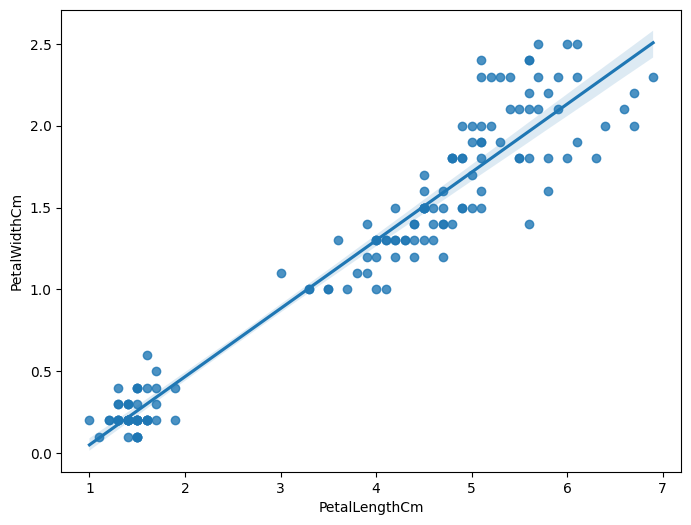

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='PetalLengthCm',y='PetalWidthCm',data=df)

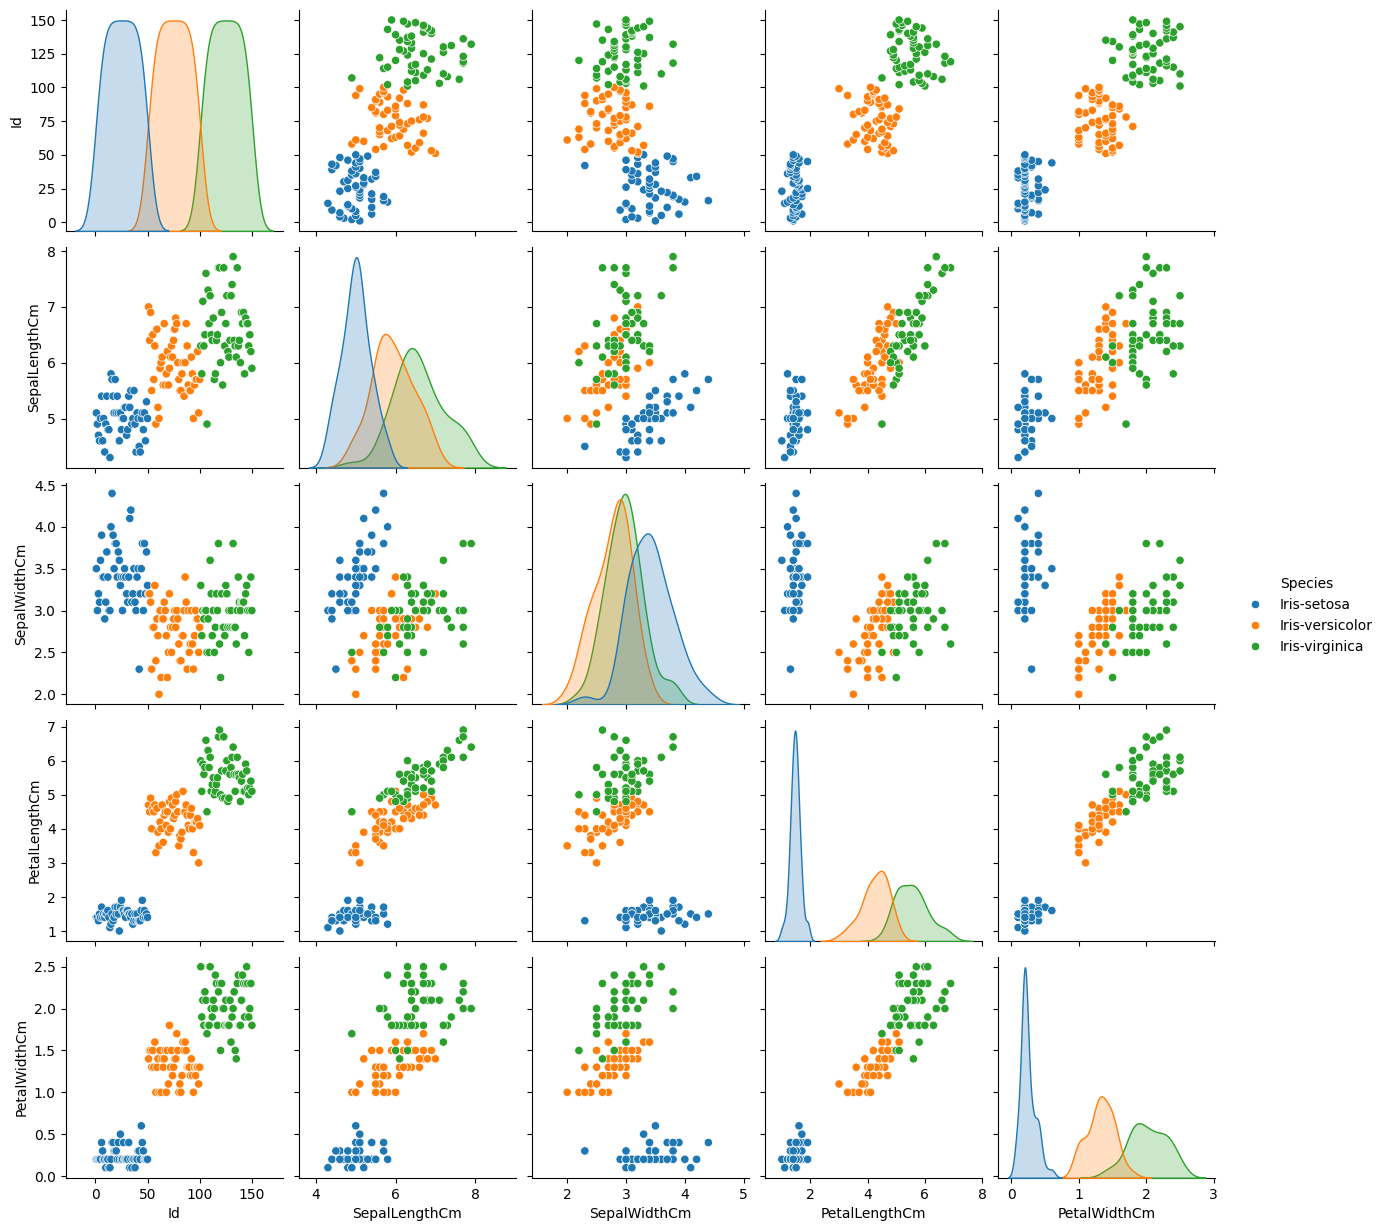

In [ ]:
sns.pairplot(data = df , hue = 'Species')

In [ ]:
x = df.iloc[: , 0:4].values
y = df.iloc[:,4].values

In [ ]:
y

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encode = LabelEncoder()
y = encode.fit_transform(y)
y

array([ 1,  1,  1,  1,  1,  3,  2,  1,  1,  0,  1,  1,  0,  0,  1,  3,  3,
        2,  2,  2,  1,  3,  1,  4,  1,  1,  3,  1,  1,  1,  1,  3,  0,  1,
        0,  1,  1,  0,  1,  1,  2,  2,  1,  5,  3,  2,  1,  1,  1,  1, 10,
       11, 11,  9, 11,  9, 12,  6,  9, 10,  6, 11,  6, 10,  9, 10, 11,  6,
       11,  7, 14,  9, 11,  8,  9, 10, 10, 13, 11,  6,  7,  6,  8, 12, 11,
       12, 11,  9,  9,  9,  8, 10,  8,  6,  9,  8,  9,  9,  7,  9, 21, 15,
       17, 14, 18, 17, 13, 14, 14, 21, 16, 15, 17, 16, 20, 19, 14, 18, 19,
       11, 19, 16, 16, 14, 17, 14, 14, 14, 17, 12, 15, 16, 18, 11, 10, 19,
       20, 14, 14, 17, 20, 19, 15, 19, 21, 19, 15, 16, 19, 14])

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=.20)

In [ ]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 6, 14,  1, 19, 11, 19,  9,  0, 19,  9, 11, 10,  8, 14, 11,  1, 19,
        0, 19, 11,  1, 11, 13,  9, 14,  1,  1, 14, 19,  6])

In [ ]:
y_test

array([10, 14,  1, 15, 14, 16,  9,  1, 20, 12, 19, 13,  9, 17, 10,  1, 14,
        1, 14, 18,  1,  7, 14,  9, 21,  1,  1, 14, 19,  6])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , y_pred)

0.36666666666666664

In [ ]:
test_errors = []

for k in range(1,10):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train , y_train)


    y_pred_test = model.predict(X_test)
    error = 1- accuracy_score(y_test , y_pred_test)
    test_errors.append(error)

test_errors

[0.7,
 0.7333333333333334,
 0.7666666666666666,
 0.6333333333333333,
 0.6333333333333333,
 0.6666666666666667,
 0.6666666666666667,
 0.7,
 0.7]